In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
# from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# tỉ lệ 8:2
df = pd.read_csv('dig.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df[::-1]

df = df.reset_index(drop=True) # Reset the index

In [4]:
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [5]:
# Assuming df is your DataFrame containing your data
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train_data = df1[:train_size]
test_data = df1[train_size:]



In [6]:
train_data

array([[-0.57234275],
       [-0.54688753],
       [-0.50871071],
       ...,
       [-0.0944997 ],
       [-0.15447899],
       [-0.22945311]])

In [7]:
from tbats import BATS, TBATS
# 3. Quá trình Training
y_train = np.array(train_data)

estimator = TBATS(
    seasonal_periods=[12, 30.25],
    use_arma_errors=True,
    use_box_cox=True
)
model = estimator.fit(y_train)


In [8]:
# 4. Quá trình testing
y_test = np.array(test_data)
y_pred =  model.forecast(steps=341)

In [9]:
print(y_pred[-30:])

[-0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364
 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364
 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364
 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364
 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364 -0.26469364]


In [10]:

y_next_30_days = y_pred[-30:]
y_pred = y_pred[:311]
print(y_pred)
print(y_next_30_days)

[-0.23811046 -0.24342709 -0.2476804  -0.25108305 -0.25380517 -0.25598286
 -0.25772501 -0.25911874 -0.26023372 -0.2611257  -0.26183929 -0.26241016
 -0.26286685 -0.26323221 -0.26352449 -0.26375832 -0.26394539 -0.26409504
 -0.26421476 -0.26431053 -0.26438715 -0.26444845 -0.26449749 -0.26453672
 -0.2645681  -0.26459321 -0.26461329 -0.26462936 -0.26464222 -0.2646525
 -0.26466073 -0.26466731 -0.26467257 -0.26467679 -0.26468016 -0.26468285
 -0.26468501 -0.26468673 -0.26468811 -0.26468922 -0.2646901  -0.26469081
 -0.26469137 -0.26469183 -0.26469219 -0.26469248 -0.26469271 -0.26469289
 -0.26469304 -0.26469316 -0.26469326 -0.26469333 -0.26469339 -0.26469344
 -0.26469348 -0.26469351 -0.26469354 -0.26469356 -0.26469357 -0.26469358
 -0.26469359 -0.2646936  -0.26469361 -0.26469361 -0.26469362 -0.26469362
 -0.26469362 -0.26469363 -0.26469363 -0.26469363 -0.26469363 -0.26469363
 -0.26469363 -0.26469363 -0.26469363 -0.26469363 -0.26469363 -0.26469363
 -0.26469363 -0.26469363 -0.26469363 -0.26469363 -0.

In [11]:
train_data = df[:train_size]
test_data = df[train_size:]
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))


In [12]:
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_rmse = sqrt(mean_squared_error(test_data, y_pred))

print('MAE:', test_mae)
print('RMSE:', test_rmse)
print('MAPE:', test_mape)


MAE: 6693.239850845959
RMSE: 7778.975563290561
MAPE: 0.28161127133562774


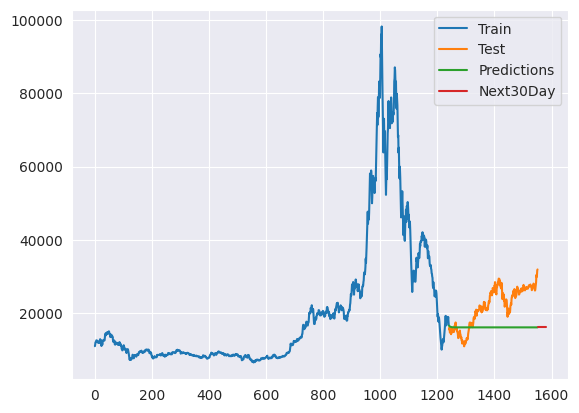

In [13]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()